In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [8]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [9]:
mdata = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
print(mdata)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [11]:
type(mdata)

tuple

In [ ]:
len(mdata)#train(학습데이터), test(테스트 데이터)

In [12]:
len(mdata[0])#x, y 데이터 2개

2

In [14]:
type(mdata[0][0])

numpy.ndarray

In [13]:
len(mdata[0][1])

60000

In [15]:
mdata[0][0].shape

(60000, 28, 28)

In [16]:
img = mdata[0][0][0]
print(mdata[0][1][0])

5


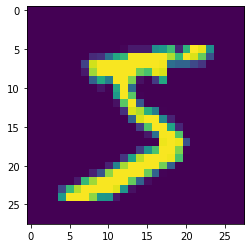

In [18]:
plt.imshow(img)

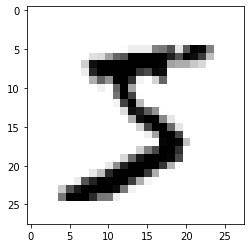

In [19]:
plt.imshow(img, cmap = plt.cm.binary)

In [20]:
def show_num(img, tag): #tag는 정답을 의미
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('tag:'+str(tag), size=40)
  plt.show()

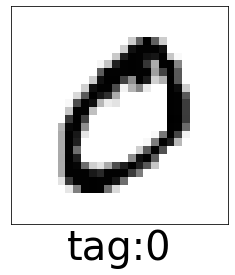

In [21]:
img = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(img, tag)

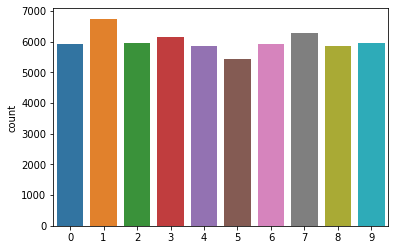

In [23]:
sns.countplot(mdata[0][1])

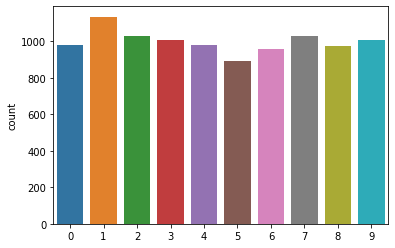

In [25]:
sns.countplot(mdata[1][1])

In [26]:
(x_train, y_train),(x_test, y_test) = mdata

In [28]:
print(len(x_train))
print(len(x_test))

60000
10000


In [30]:
x_train[0].max()

255

In [32]:
x_train[0].min()

0

In [34]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [36]:
x_train[0].max()

0.00392156862745098

In [37]:
x_train[0].min()

0.0

In [42]:
print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])


In [46]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [66]:
model.fit(x_train,y_train,epochs=5)#epochs는 데이터학습을몇번반복할건지

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0604 - accuracy: 0.9811
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0600 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0592 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0595 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9818


In [67]:
model.evaluate(x_test,y_test, verbose=2)

313/313 - 0s - loss: 0.0794 - accuracy: 0.9757


[0.07944269478321075, 0.9757000207901001]

In [68]:
i = result[0].max()

In [69]:
result[0].tolist().index(i)

7

In [70]:
result = model.predict(x_test)
result[0]

array([8.8622969e-08, 1.6664383e-11, 2.0403802e-06, 1.0759572e-03,
       1.1672213e-16, 8.2647249e-09, 5.0243715e-17, 9.9886537e-01,
       2.0041375e-06, 5.4506399e-05], dtype=float32)

In [71]:
model.predict(x_test)

array([[8.86229685e-08, 1.66643834e-11, 2.04038020e-06, ...,
        9.98865366e-01, 2.00413751e-06, 5.45063995e-05],
       [2.99837988e-10, 6.58761710e-05, 9.99928832e-01, ...,
        8.60949162e-20, 9.40804270e-08, 1.04184146e-16],
       [8.83370177e-08, 9.98213291e-01, 9.56634685e-05, ...,
        1.21124438e-03, 4.33936657e-04, 1.62664460e-08],
       ...,
       [3.76804639e-14, 3.88963167e-13, 1.98712314e-12, ...,
        1.83953694e-06, 1.09636346e-06, 1.73752109e-04],
       [1.31134077e-13, 5.30032795e-10, 8.05112812e-13, ...,
        1.32141222e-08, 1.68166327e-04, 1.99805493e-12],
       [1.97242472e-10, 1.85124490e-16, 1.32409397e-07, ...,
        1.69651832e-16, 1.07217187e-10, 4.79082750e-14]], dtype=float32)

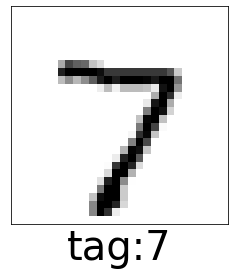

In [72]:
show_num(x_test[0],y_test[0])